In [50]:
import numpy as np
from math import exp
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score

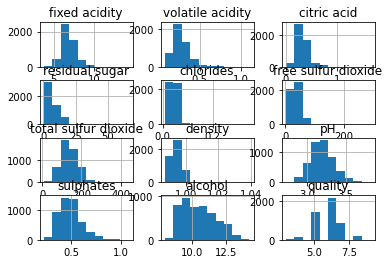

In [41]:
df = pd.read_csv('whitewine.csv', delimiter=';')
d = df.hist()

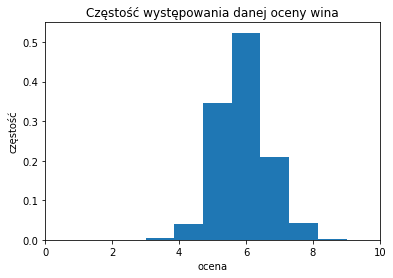

In [42]:

df = pd.read_csv('whitewine.csv', delimiter=';')
quality_data = df['quality'].to_numpy()
n, bins, patches = plt.hist(quality_data, 7, density=True)
plt.xlim(0, 10)
plt.title("Częstość występowania danej oceny wina")
plt.xlabel("ocena")
plt.ylabel("częstość")
plt.show()


Text(0.5, 1.0, 'Korelacja pomiędzy cechami')

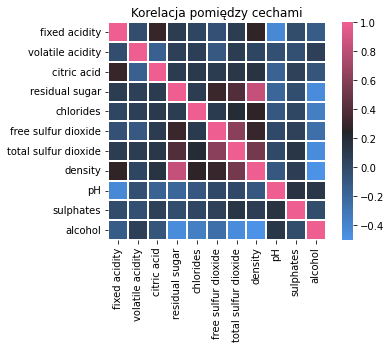

In [43]:
corr = df.iloc[:, :-1].corr(method='pearson')
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2).set_title("Korelacja pomiędzy cechami")

In [44]:
def calculate_p_y(df):
    quality_list = list(range(0, 11))
    p_quality = []
    row_count = len(df)
    for quality in quality_list:
        if quality in (0, 1, 2, 10): #nie ma ich w dataset, więc ustawiam prawdopodobieństwo na 0
            p_quality.append(0)
        else:
            p_quality.append(len(df[df['quality'] == quality])/row_count)
    return p_quality

In [45]:

def calculate_p_attr_y(attr_value, mean, var):
    p_attr_y = exp((-(attr_value - mean)**2)/(2 * var))/(np.sqrt(2 * np.pi * var))
    return p_attr_y

In [46]:
def naive_bayes_classifier(train_df, test_samples):
    attributes = list(df.columns)[:-1]
    p_quality = calculate_p_y(train_df)
    quality_pred = []
    quality_list = list(range(0, 11))
    df_mean = train_df.groupby(['quality']).mean()
    df_var = train_df.groupby(['quality']).var()
    for sample in test_samples:
        p_attr_y_list = [1]*11
        for quality in quality_list:
            for attr in range(len(attributes)):
                if quality in (0, 1, 2, 10):   #nie ma ich w dataset, więc ustawiam prawdopodobieństwo na 0
                    p_attr_y_list[quality] = 0
                else:
                    p_attr_y_list[quality] *= calculate_p_attr_y(sample[attr], df_mean.loc[quality][attributes[attr]], df_var.loc[quality][attributes[attr]])
        post_prob = [1]*11
        for quality in quality_list:
            post_prob[quality] = p_attr_y_list[quality] * p_quality[quality]
        quality_pred.append(np.argmax(post_prob))
    return np.array(quality_pred)

In [47]:
df = pd.read_csv('whitewine.csv', delimiter=';')
# df = df.drop(columns='density')
train_df, test_df = train_test_split(df, test_size=0.4, random_state=1)
X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:, -1].values
Y_pred = naive_bayes_classifier(train_df, X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred, normalize=True))
print(f1_score(Y_test, Y_pred, average='weighted'))

[[  1   0   1   2   0   0   0]
 [  0  13  16  20   6   0   0]
 [  3  25 302 219  56   1   0]
 [  4  16 214 335 276   3   5]
 [  0   0  34  81 246   2  10]
 [  0   0   5  12  43   5   3]
 [  0   0   0   1   0   0   0]]
0.4602040816326531
0.4550401973439951


In [49]:
k = 5
df = pd.read_csv('whitewine.csv', delimiter=';')
# df = df.drop(columns='density')
df = df.sample(frac=1, random_state=3)
split_dfs = np.array_split(df, k)
scores = []
for i in range(0, k):
    frames = split_dfs[0:i] + split_dfs[i + 1::]
    train_df = pd.concat(frames)
    test_df = split_dfs[i]
    X_test = test_df.iloc[:, :-1].values
    Y_test = test_df.iloc[:, -1].values
    Y_pred = naive_bayes_classifier(train_df, X_test)
    print(confusion_matrix(Y_test, Y_pred))
    scores.append(f1_score(Y_test, Y_pred, average='weighted'))
print(sum(scores)/k)


[[  1   1   0   2   2   0   0]
 [  1   8  10   2   1   0   1]
 [  6  12 151  72  39   0   0]
 [  4   8 123 134 175   1   0]
 [  0   1  21  26 124   4   0]
 [  0   2   5   9  32   0   0]
 [  0   0   0   0   2   0   0]]
[[  3   0   0   0   1   0]
 [  0   4  16   8   8   0]
 [  5  12 153  81  36   1]
 [  3   8 125 150 170   1]
 [  0   0  15  32 107   2]
 [  0   0   2  11  26   0]]
[[  0   0   0   0   0   0   0]
 [  1   8  10  18   3   0   0]
 [  3   8 148  98  31   0   0]
 [  4   5 116 146 149   5   0]
 [  0   1  19  50 121   4   0]
 [  0   0   3   5  20   3   0]
 [  0   0   0   0   1   0   0]]
[[  0   1   0   1   1   0   0]
 [  0   6  10  10   3   0   0]
 [  1  15 159  94  28   0   0]
 [  0   6 142 141 161   1   1]
 [  1   0  19  43 100   1   4]
 [  1   0   4   4  18   1   1]
 [  0   0   0   1   0   0   0]]
[[  2   2   2   1   0   0   0]
 [  1  10  12   4   6   2   0]
 [  3  11 189  71  30   0   0]
 [  2   7  98 170 141   1   0]
 [  0   0  21  33 129   2   0]
 [  0   0   3   3  21   1   